<a href="https://colab.research.google.com/github/mani-312/Posts_Recommendation_System/blob/main/posts_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Collaborative-based filtering**
-- Recommending based on the past history of user-item activity

In [ ]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'


**--Loading views.csv**

In [ ]:
views = pd.read_csv("/content/drive/MyDrive/internshala_files/views.csv")
views.head()

,user_id,post_id,timestamp
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z


In [ ]:
views.shape

(1449, 3)

In [ ]:
views.isnull().sum()

user_id      0
post_id      0
timestamp    0
dtype: int64

**Add new column 'visits' to dataframe**
          

> --visits = Number of times each user viewed a post



In [ ]:
views = views.groupby(['user_id', 'post_id']).size()
views = views.to_frame(name = 'visits').reset_index()
views.sort_values('visits',ascending=False).head()

,user_id,post_id,visits
442,5d7c994d5720533e15c3b1e9,5eb2c11210426255a7aaa052,5
801,5e1ef04c2a37d20505da2b8b,5eb15a9810426255a7aaa019,3
52,5d60098a653a331687083238,5e830a6ca3258347b42f23f6,3
321,5d610ae1653a331687083239,5eb159a610426255a7aaa015,2
48,5d60098a653a331687083238,5e82390ea3258347b42f2369,2


In [ ]:
views.shape

(1397, 3)

**Loading posts.csv file**

In [ ]:
posts = pd.read_csv("/content/drive/MyDrive/internshala_files/posts.csv")
posts.columns=['post_id', 'title', 'category', ' post_type']
posts.head()

,post_id,title,category,post_type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog


In [ ]:
posts.isna().sum()

post_id       0
title         0
category      8
 post_type    0
dtype: int64

**--Dropping empty rows in posts**

In [ ]:
posts = posts.dropna()

**Checking whether id's of posts are unique**

In [ ]:
posts['post_id'].value_counts().sort_values(ascending=False).head()

5e78ae4ccfc8b713f5ac7cde    1
5e9f3fd9a3258347b42f2e3f    1
5e773c89cfc8b713f5ac7ac9    1
5e37dc1aeab55d319938a720    1
5e2d4737c85ab714a7da66d9    1
Name: post_id, dtype: int64

**Maintain hashsets for interchangability**

In [ ]:
id_to_title = {}
for i in range(posts.shape[0]):
  id_to_title[posts.iloc[i][0]]=posts.iloc[i][1]

In [ ]:
posts.shape

(485, 4)

In [ ]:
len(id_to_title)

485

**Merge posts and views dataframe on post_id**

In [ ]:
df = pd.merge(views,posts,on='post_id')
df.sort_values('visits',ascending=False).head()

,user_id,post_id,visits,title,category,post_type
462,5d7c994d5720533e15c3b1e9,5eb2c11210426255a7aaa052,5,Gangster Style,Drawings,artwork
456,5e1ef04c2a37d20505da2b8b,5eb15a9810426255a7aaa019,3,MOSAIC ART,Craft|Mixed Media|Conceptual|Mosaic painting|2...,artwork
129,5d60098a653a331687083238,5e830a6ca3258347b42f23f6,3,Dog❤️,Photography,artwork
933,5e1ef04c2a37d20505da2b8b,5eb159a610426255a7aaa015,2,PRINCIPLES OF DESIGN (RHYTHM),Craft|Drawings|Conceptual|2D Composition,artwork
225,5e1ef04c2a37d20505da2b8b,5e948fdfa3258347b42f28ca,2,monument,Photography,artwork


**Number of users who viewed atleast one post**

In [ ]:
df['user_id'].unique().shape

(118,)

**Number of posts which are viewed by atleast one user**

In [ ]:
df['post_id'].unique().shape

(485,)

In [ ]:
df.isna().sum() 

user_id       0
post_id       0
visits        0
title         0
category      0
 post_type    0
dtype: int64

In [ ]:
df.columns

Index(['user_id', 'post_id', 'visits', 'title', 'category', ' post_type'], dtype='object')

**Total views of each post**

In [ ]:
# Number of persons visited for each post
df1 = pd.DataFrame(df.groupby(['post_id','title'])["visits"].sum())
df1.columns=["total_views"]
df1.sort_values('total_views',ascending=False).head()

,,total_views
post_id,title,
5ec1fd0974f7660d73aa0fd5,Daaku,18
5ecd5d417023451e662235c5,"Machine Learning”&“Operations"" (MlOps)",16
5ecc1d4eeaff6b0c3a58a565,Faith in yourself,14
5eb2c11210426255a7aaa052,Gangster Style,14
5ecce8a5eaff6b0c3a58a5e9,The Waves Have Stood Still,14


Text(0, 0.5, 'No.of posts')

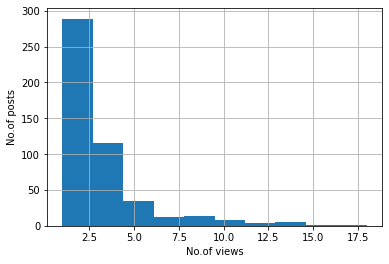

In [ ]:
import matplotlib.pyplot as plt
df1['total_views'].hist()
plt.xlabel('No.of views')
plt.ylabel('No.of posts')

**Total visits of each user**

In [ ]:
# Number of posts viewed by each user
df2 = pd.DataFrame(df.groupby(['user_id'])["visits"].sum())
df2.columns=["total_visits"]
df2.sort_values('total_visits',ascending=False).head()

,total_visits
user_id,
5d60098a653a331687083238,225
5d610ae1653a331687083239,135
5d7c994d5720533e15c3b1e9,93
5df20f1fee4bb5252b4f5351,81
5deeef6142a8854bf6eabab9,67


Text(0, 0.5, 'No.of users')

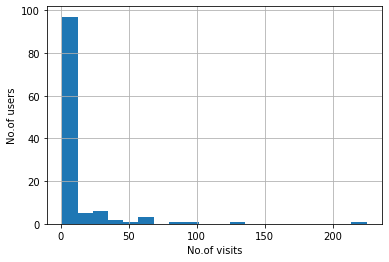

In [ ]:
df2['total_visits'].hist(bins=20)
plt.xlabel('No.of visits')
plt.ylabel('No.of users')

 **Popular posts**

Text(0.5, 1.0, 'Popular posts')

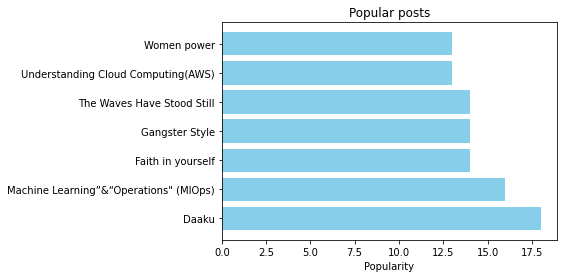

In [ ]:
top_posts = [i[1] for i in np.array(df1.sort_values('total_views',ascending=False).index)[0:7]]
top_views = df1['total_views'].sort_values(ascending=False).values[0:7]
plt.barh(top_posts,top_views,align='center',color='skyblue')
plt.xlabel('Popularity')
plt.title('Popular posts')

# **Recommending similar posts for a given post**

## **1. By comparing correlation**

**Create a user-item interaction matrix for users and posts**

In [ ]:
interaction_mat = df.pivot_table(index='user_id',columns='post_id',values='visits')
interaction_mat = interaction_mat.fillna(0)
interaction_mat.head()

post_id,5d62abaa65218653a132c956,5d6d39567fa40e1417a4931c,5d7d23315720533e15c3b1ee,5d7d405e5720533e15c3b1f3,5d80dfbc6c53455f896e600e,5d80e7c16c53455f896e6014,5d80ecfd6c53455f896e601a,5d81323a6c53455f896e6044,5d9b3514979d5962253c2f90,5d9b950768671220a1b2b153,5da745b6019399436815c4cd,5dada695610ba040fbfdf585,5dada734610ba040fbfdf588,5dada798610ba040fbfdf58b,5dada82f610ba040fbfdf58e,5dada89b610ba040fbfdf591,5dadf6ae610ba040fbfdf5c8,5db2a7d099cbb90e4339c734,5db2b91a99cbb90e4339c749,5dbc622a99cbb90e4339c7f6,5dbc631f99cbb90e4339c7fd,5dc065ca24b883670268772f,5dd1751db802e41ed198b680,5dde6a91369b28584ecca156,5de7971b8eab6401affbb137,5de8d73249e8203ff9219a74,5dea816a42a8854bf6eaba89,5dee9b5042a8854bf6eabaaf,5df64ad1cc709107827fb3dd,5e04fb252a37d20505da2a2b,5e1029f22a37d20505da2a79,5e27002d2a37d20505da2c13,5e281cf0025ae20886de2050,5e2867f6025ae20886de205a,5e294fd1c85ab714a7da6643,5e2d36ebc85ab714a7da66d1,5e2d3fbfc85ab714a7da66d5,5e2d447dc85ab714a7da66d7,5e2d4737c85ab714a7da66d9,5e2d4d63c85ab714a7da66db,...,5ecd5d417023451e662235c5,5ecd6ba47023451e66223604,5ecdecc67023451e66223765,5ecf23b87023451e66223944,5ecf818376027d35905cbf03,5ecf96e876027d35905cbf46,5ecfa0ca76027d35905cbf57,5ecfafcc76027d35905cbfb0,5ecfb35c76027d35905cbfbc,5ecfffb976027d35905cc0e9,5ed0007a76027d35905cc0ea,5ed09ad076027d35905cc15f,5ed0e20776027d35905cc2fe,5ed13d2876027d35905cc4c2,5ed141aa76027d35905cc4c9,5ed175f176027d35905cc554,5ed175f476027d35905cc562,5ed1ff0276027d35905cc60d,5ed229d976027d35905cc666,5ed2378276027d35905cc6b5,5ed237d676027d35905cc6bd,5ed2383776027d35905cc6ca,5ed238d376027d35905cc6e5,5ed23a6376027d35905cc73b,5ed23b0776027d35905cc746,5ed23b6276027d35905cc74f,5ed23bb876027d35905cc759,5ed23c1876027d35905cc761,5ed23c8676027d35905cc780,5ed23cb876027d35905cc788,5ed23cf876027d35905cc790,5ed23d4276027d35905cc798,5ed23e4d76027d35905cc7b8,5ed2502b76027d35905cc7db,5ed3476576027d35905cca1d,5ed3791976027d35905ccab6,5ed3820f76027d35905ccac8,5ed3ef4cbd514d602c1530f2,5ed415c6bd514d602c15312d,5ed4cbadbd514d602c1531a6
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5d60098a653a331687083238,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5d610ae1653a331687083239,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5d618359fc5fcf3bdd9a0910,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5d6d2bb87fa40e1417a49315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5d7c994d5720533e15c3b1e9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def get_postid(post_title):
  return posts[posts['title']==post_title]['post_id'].values[0]

In [ ]:
def get_rec_corr(postid):
  print("Title :",id_to_title[postid])
  postid_views = interaction_mat[postid]
  similar_to_postid = interaction_mat.corrwith(postid_views)
  corr_postid = pd.DataFrame(list(zip(similar_to_postid.index,similar_to_postid.values)),columns=['post_id','Correlation'])
  corr_postid['title'] = corr_postid['post_id'].apply(lambda x: id_to_title[x])
  return corr_postid.sort_values('Correlation',ascending=False).head(10)

**Recommending posts for a post_id**

In [ ]:
# If you want to recommend posts by giving post name uncomment following 2 lines
# and comment third line
#post_title = 'Operators In PHP'
#postid = get_postid(post_title)

postid = '5e41bd7deab55d319938a839'
get_rec_corr(postid)

Title : Operators In PHP


,post_id,Correlation,title
76,5e41bd7deab55d319938a839,1.000000,Operators In PHP
47,5e36e7baeab55d319938a6d1,1.000000,E-Commerce
95,5e4ed8ccf5561b1994c8e47d,0.704078,Leap year checking (.net)
82,5e4ba3a9f5561b1994c8e392,0.704078,Hand Art
93,5e4dab15f5561b1994c8e446,0.704078,Palindrome No.(PHP)
92,5e4da7c8f5561b1994c8e439,0.704078,Factorial of a No.(PHP)
91,5e4da502f5561b1994c8e42c,0.704078,Prime No.(PHP)
89,5e4c435cf5561b1994c8e400,0.704078,Printers
88,5e4c3d1df5561b1994c8e3f3,0.704078,Raster graphics systems
87,5e4c3c09f5561b1994c8e3e6,0.704078,Stereoscopic and virtual-reality systems


## **2. Using K-Nearest Neighbours of a post**

**Maintain hashsets for interchangability between post_id to index of post_id in interaction matrix**

In [ ]:
id_to_index = {}
index_to_id = {}
index = 0
for i in interaction_mat.columns:
  id_to_index[i] = index
  index+=1
index_to_id = {v:k for k,v in id_to_index.items()}

**Transpose the interaction_matrix with post_id on rows and user_id on columns**

In [ ]:
X = np.transpose(interaction_mat.values)

In [ ]:
X.shape

(485, 118)

**Instantiate a model of NearestNeighbours**

In [ ]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors = 20,
                        algorithm = 'brute',
                        metric = 'cosine',
                        n_jobs = -1)

In [ ]:
from scipy.sparse import csr_matrix
# transform matrix to scipy sparse matrix
X = csr_matrix(X)

**Fit X with model**

In [ ]:
model.fit(X)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [ ]:
def get_rec_knn(postid):
  print('Title : ', id_to_title[postid])
  index = id_to_index[postid]
  dist, indices = model.kneighbors(X[index].reshape(1,-1))
  df1 = pd.DataFrame(list(zip(dist.squeeze(),indices.squeeze())),columns=['distance','Index'])
  df1['post_id'] = df1['Index'].apply(lambda x: index_to_id[x])
  df1['title'] = df1['post_id'].apply(lambda x: id_to_title[x]) 
  print('Recommendations for post: ',id_to_title[postid])
  return df1.sort_values('distance',ascending=True).head(10)

**Find K(20)-Nearest neighoubers to post_id**

In [ ]:
# If you want to recommend posts by giving post name uncomment following 2 lines
# and comment third line
#post_title = 'Operators In PHP'
#postid = get_postid(post_title)

postid = '5e41bd7deab55d319938a839'
get_rec_knn(postid)

Title :  Operators In PHP
Recommendations for post:  Operators In PHP


,distance,Index,post_id,title
0,2.220446e-16,47,5e36e7baeab55d319938a6d1,E-Commerce
1,2.220446e-16,76,5e41bd7deab55d319938a839,Operators In PHP
17,2.928932e-01,88,5e4c3d1df5561b1994c8e3f3,Raster graphics systems
16,2.928932e-01,63,5e3ea110eab55d319938a7a7,OS
15,2.928932e-01,62,5e3e9cc0eab55d319938a79b,C#(.NET)
14,2.928932e-01,61,5e3c7293eab55d319938a74d,PHP
13,2.928932e-01,96,5e4edd1bf5561b1994c8e48a,Delegates(.net)
12,2.928932e-01,95,5e4ed8ccf5561b1994c8e47d,Leap year checking (.net)
11,2.928932e-01,79,5e45b5c9f5561b1994c8e32d,EDI (Electronic data interchange)
10,2.928932e-01,93,5e4dab15f5561b1994c8e446,Palindrome No.(PHP)


## **3.By factorizing the interaction matrix**

In [ ]:
X = interaction_mat.values.T

#Normalizing the matrix(subtract mean off)
normalised_mat = X - np.asarray([(np.mean(X, 1))]).T

#Computing the Singular Value Decomposition (SVD)
A = normalised_mat.T / np.sqrt(X.shape[0] - 1)
U, S, V = np.linalg.svd(A)

#Function to calculate the cosine similarity (sorting by most similar and returning the top N)
def top_cosine_similarity(data, index, top_n=10):
    post_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(post_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]
#k-principal components to represent movies, movie_id to find recommendations, top_n print n results        
k = 50
# If you want to recommend posts by giving post name uncomment following 2 lines
# and comment third line
#post_title = 'Launching an EC2 instance.'
#postid = get_postid(post_title)

postid = '5ed13d2876027d35905cc4c2'
index = list(interaction_mat.columns).index(postid)
top_n = 10
sliced = V.T[:, :k] # representative data
post_indices = top_cosine_similarity(sliced, index, top_n)
print('Recommendations for post_id: ',postid)
print('Title: ',id_to_title[postid])
id_s = [index_to_id[i] for i in post_indices]
rec = posts[posts['post_id'].apply(lambda x: x in id_s)]
rec['rank'] = rec['post_id'].apply(lambda x: id_s.index(x)+1)
rec.sort_values('rank').head(10)

Recommendations for post_id:  5ed13d2876027d35905cc4c2
Title:  Launching an EC2 instance.


,post_id,title,category,post_type,rank
466,5ed13d2876027d35905cc4c2,Launching an EC2 instance.,Technology,skill,1
486,5ed2502b76027d35905cc7db,Learning...,Computer Technology|Machine Learning,blog,2
400,5eb4fab110426255a7aaa0ed,God Drawing,Drawings,artwork,3
467,5ed141aa76027d35905cc4c9,Integrating Machine Learning with devOps(MLops),Computer Technology|Data Science,blog,4
482,5ed23cb876027d35905cc788,Fear.,Typography|Calligraphy|Pen and ink,artwork,5
434,5ec7a8bdec493f4a26558846,HUMAN ILLUSTRATION,Drawings|Fashion Design|Illustration|Watercolours,artwork,6
137,5e773c89cfc8b713f5ac7ac9,Corona: What it is; how to prevent it and its ...,Mass Media|Indian Government,blog,7
190,5e81be54a3258347b42f221d,Work From Home: Working Under Corona's Effect,Mass Media|Indian Government,blog,8
487,5ed3476576027d35905cca1d,AWS CLI Setup in Mac,Technology,skill,9
141,5e77738bcfc8b713f5ac7b36,Cloud Computing,Computer Technology|Cloud Computing,blog,10


# **Recommending posts to a user**

## **1. Finding K-Nearest Neighbours to a post furthur recommending popular posts of neighbours**

In [ ]:
model = NearestNeighbors(n_neighbors = 20,
                        algorithm = 'brute',
                        metric = 'cosine',
                        n_jobs = -1)

In [ ]:
# user_id along rows and post_id along columns
interaction_mat.shape

(118, 485)

**Fit a matrix to the model**

In [ ]:
model.fit(interaction_mat)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

**Find K neighbours to the user_id**

In [ ]:
userid = '5ece02427023451e66223861'
print('User_id : ', userid)
index = list(interaction_mat.index).index(userid)
dist, indices = model.kneighbors(interaction_mat.values[index].reshape(1,-1))

User_id :  5ece02427023451e66223861


**Indices of K nearest user_id's**

In [ ]:
indices

array([[ 90,  97, 116, 114,  99, 103, 102, 109,  98, 111, 101,  89, 106,
        100,   2, 112,  87,   0,   9,   4]])

**Past history of user_id**

In [ ]:
print("Previous posts viewed by user: ",userid)
df[df['user_id']==userid].drop('user_id',axis=1)

Previous posts viewed by user:  5ece02427023451e66223861


,post_id,visits,title,category,post_type
768,5ed09ad076027d35905cc15f,1,Understanding Cloud Computing(AWS),Computer Technology|Cloud Computing,blog
790,5ed1ff0276027d35905cc60d,1,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog


**Find the popular posts among nearest user_id's**

In [ ]:
views_count = [0]*interaction_mat.shape[1]
for i in indices[0]:
  for j in range(interaction_mat.shape[1]):
    views_count[j]+=interaction_mat.iloc[i][j]

**Get the top 20 posts which are viewed by nearest user_id's**

In [ ]:
post_indices = np.argsort(-np.array(views_count))[:20]
post_indices

array([456, 462, 445, 450, 391, 443, 422, 444, 451, 411, 458, 430, 446,
       448, 440, 436, 449, 433, 230, 367])

In [ ]:
print('Recommendations for user_id: ',userid)
id_s = [index_to_id[i] for i in post_indices]
rec = posts[posts['post_id'].apply(lambda x: x in id_s)]
rec['rank'] = rec['post_id'].apply(lambda x: id_s.index(x)+1)
rec.sort_values('rank').head(10)

Recommendations for user_id:  5ece02427023451e66223861


,post_id,title,category,post_type,rank
461,5ed09ad076027d35905cc15f,Understanding Cloud Computing(AWS),Computer Technology|Cloud Computing,blog,1
470,5ed1ff0276027d35905cc60d,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog,2
450,5ecd5d417023451e662235c5,"Machine Learning”&“Operations"" (MlOps)",Computer Technology|Machine Learning,blog,3
455,5ecf96e876027d35905cbf46,GAN's Part(2),Computer Technology|Machine Learning,blog,4
395,5eb2c11210426255a7aaa052,Gangster Style,Drawings,artwork,5
448,5ecc1d4eeaff6b0c3a58a565,Faith in yourself,Photography,artwork,6
426,5ec54fc9f2781131cc7e50f5,Future Communication Predictions,Science;Technology,skill,7
449,5ecce8a5eaff6b0c3a58a5e9,The Waves Have Stood Still,Photography,artwork,8
456,5ecfa0ca76027d35905cbf57,Recommend Systems Machine Learning,Computer Technology|Machine Learning,blog,9
415,5ec1fd0974f7660d73aa0fd5,Daaku,Drawings,artwork,10


## **2. Factorizarion of interaction_matrix**

In [ ]:
!pip install sparsesvd
import math as mt
import csv
from sparsesvd import sparsesvd #used for matrix factorization
from scipy.sparse import csc_matrix #used for sparse matrix
from scipy.sparse.linalg import * #used for matrix multiplication

In [ ]:
#constants defining the dimensions of our User Visiting Matrix (UVM)
MAX_PID = interaction_mat.shape[1]
MAX_UID = interaction_mat.shape[0]

#Compute SVD of the user ratings matrix
def computeSVD(uvm, K):

    # Factorizes uvm into U,s,Vt such that
    # uvm = numpy.dot(U.T, numpy.dot(numpy.diag(s), Vt)))
    U, s, Vt = sparsesvd(uvm, K)

    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0, len(s)):
        S[i,i] = mt.sqrt(s[i])

    U = csc_matrix(np.transpose(U), dtype=np.float32)
    S = csc_matrix(S, dtype=np.float32)
    Vt = csc_matrix(Vt, dtype=np.float32)
    
    return U, S, Vt

#Compute estimated visits for the test user
def computeEstimatedVisits(uvm, U, S, Vt, uTest, K, test):
    rightTerm = S*Vt 

    estimatedVisits = np.zeros(shape=(MAX_UID, MAX_PID), dtype=np.float16)
    for userTest in uTest:
        prod = U[userTest, :]*rightTerm
        #we convert the vector to dense format in order to get the indices 
        #of the movies with the best estimated ratings 
        estimatedVisits[userTest, :] = prod.todense()
        recom = (-estimatedVisits[userTest, :]).argsort()[:250]
    return recom

In [ ]:
#Used in SVD calculation (number of latent factors)
K = 100

#Initialize a sample user rating matrix
uvm = interaction_mat
uvm = csc_matrix(uvm, dtype=np.float32)

#Compute SVD of the input user visits matrix
U, S, Vt = computeSVD(uvm, K)

userid = '5ece02427023451e66223861'
index = list(interaction_mat.index).index(userid)
#index = 55
#userid = interaction_mat.index[index]
uTest = [index]

print("Previous posts viewed by user: ",userid)
df[df['user_id']==userid].drop('user_id',axis=1)

Previous posts viewed by user:  5ece02427023451e66223861


,post_id,visits,title,category,post_type
768,5ed09ad076027d35905cc15f,1,Understanding Cloud Computing(AWS),Computer Technology|Cloud Computing,blog
790,5ed1ff0276027d35905cc60d,1,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog


In [ ]:
print("Recommended posts for userid: ",userid)
rec_posts = computeEstimatedVisits(uvm, U, S, Vt, uTest, K, True)

id_s = [index_to_id[i] for i in rec_posts]
rec = posts[posts['post_id'].apply(lambda x: x in id_s)]
rec['rank'] = rec['post_id'].apply(lambda x: id_s.index(x)+1)
rec.sort_values('rank').head(10)

Recommended posts for userid:  5ece02427023451e66223861


,post_id,title,category,post_type,rank
470,5ed1ff0276027d35905cc60d,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog,1
461,5ed09ad076027d35905cc15f,Understanding Cloud Computing(AWS),Computer Technology|Cloud Computing,blog,2
487,5ed3476576027d35905cca1d,AWS CLI Setup in Mac,Technology,skill,3
474,5ed2383776027d35905cc6ca,Self belief.,Typography|Pen and ink,artwork,4
438,5ec8204cec493f4a26558893,Art Expo 2020,Artistic design|Logo Design|Graphic|Illustration,artwork,5
188,5e81ba06a3258347b42f21ef,Managing Stress Amidst Corona,Mass Media|Indian Government,blog,6
411,5ebc3239514aab59896bcc86,The Basic Edge of Design.,Fashion Desigining|Fashion Illustration|Patter...,blog,7
189,5e81bc41a3258347b42f220a,How to Maintain Physical Distance: Physical Di...,Mass Media|Indian Government,blog,8
410,5eba2e94514aab59896bcc5a,Sky never disappoints me!,Photography,artwork,9
180,5e7f4fb3a3258347b42f2156,100 Free University Courses Online [2020],Biotechnology|Plant Biotechnology,blog,10


# **Content based filtering**
-- Recommending based on the similar features of users and items

## **Recommending similar posts for a post**

In [ ]:
posts.head()

,post_id,title,category,post_type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog


**Add a column describing about post**

In [ ]:
def combine(row):
  try:
    return row['title']+' '+row['category']+' '+row[' post_type']
  except:
    print(row)
df3 = posts.copy()
df3['about'] = df3.apply(combine,axis=1) 
df3.head()

,post_id,title,category,post_type,about
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog,hello there Plant Biotechnology blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog,Ml and AI Artificial Intelligence|Machine Lear...
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog,What is an Operating System ? Operating System...
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork,Lord Shiva Drawings artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog,How Competition law evolved? Competition Laws ...


**Convert words into vectors**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(df3['about'])

**Find similarity between every pair of posts**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(count_matrix)
cosine_sim

array([[1.        , 0.14142136, 0.14142136, ..., 0.        , 0.        ,
        0.09325048],
       [0.14142136, 1.        , 0.1       , ..., 0.63245553, 0.2236068 ,
        0.32969024],
       [0.14142136, 0.1       , 1.        , ..., 0.        , 0.        ,
        0.06593805],
       ...,
       [0.        , 0.63245553, 0.        , ..., 1.        , 0.23570226,
        0.20851441],
       [0.        , 0.2236068 , 0.        , ..., 0.23570226, 1.        ,
        0.14744196],
       [0.09325048, 0.32969024, 0.06593805, ..., 0.20851441, 0.14744196,
        1.        ]])

**Get the row of corresponding postid's and find 20 top similar posts**

In [ ]:
# If you want to recommend posts by giving post name uncomment following 2 lines
# and comment third line
#post_title = 'Launching an EC2 instance.'
#postid = get_postid(post_title)

postid = '5ed13d2876027d35905cc4c2'
index = list(df3['post_id']).index(postid)
cosine_row = cosine_sim[index]
indices = np.argsort(-cosine_row)[:20]
indices

array([458, 422, 479, 126, 108, 483,  16, 316, 390, 101, 480, 109, 105,
        99, 110,  87, 104, 112, 111, 107])

In [ ]:
print('Recommendations for post_id: ',postid)
print("Title : ",id_to_title[postid])
rec = posts.iloc[indices]
rec['rank'] = rec['post_id'].apply(lambda x: list(indices).index(list(posts['post_id']).index(x))+1)
rec.head(10)

Recommendations for post_id:  5ed13d2876027d35905cc4c2
Title :  Launching an EC2 instance.


,post_id,title,category,post_type,rank
466,5ed13d2876027d35905cc4c2,Launching an EC2 instance.,Technology,skill,1
426,5ec54fc9f2781131cc7e50f5,Future Communication Predictions,Science;Technology,skill,2
487,5ed3476576027d35905cca1d,AWS CLI Setup in Mac,Technology,skill,3
128,5e65346c85ae350860168b53,What is Information technology?,Computer Technology|Information Technology,blog,4
110,5e51a46ad701ab08af7929cf,Ethernet,Computer Technology|Information Technology,blog,5
491,5ed415c6bd514d602c15312d,Face Recognition using Transfer Learning.,Science; Technology,skill,6
16,5dadf6ae610ba040fbfdf5c8,MIS,Computer Technology|Information Technology,blog,7
318,5e9db770a3258347b42f2dcf,E s c a p e,Photography,skill,8
393,5eb1ac4510426255a7aaa024,E-book,Video,skill,9
103,5e50207cd15de17a8cf1b92c,Mobile Computing Technology,Computer Technology|Mobile Applications,blog,10


## **Recommending posts to a user**

In [ ]:
userid = '5ece02427023451e66223861'
print("Previous posts viewed by user: ",userid)
df[df['user_id']==userid].drop('user_id',axis=1)

Previous posts viewed by user:  5ece02427023451e66223861


,post_id,visits,title,category,post_type
768,5ed09ad076027d35905cc15f,1,Understanding Cloud Computing(AWS),Computer Technology|Cloud Computing,blog
790,5ed1ff0276027d35905cc60d,1,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog


**Get the indices of posts viewed by user_id**

In [ ]:
posts = df[df['user_id']==userid]['post_id'].values
post_indices = [list(df3['post_id']).index(i) for i in posts]
post_indices

[456, 462]

**Find 20 posts which are similar to past viewed posts of user_id**

In [ ]:
# Calculate each column sum across post_indices rows
similar_posts = cosine_sim[post_indices].sum(axis=0)
indices = np.argsort(-similar_posts)[:20]
indices

array([456, 462, 139, 463, 289, 102, 101,  16, 108, 110, 105,  99, 100,
        89, 112, 104, 106, 107, 111, 114])

In [ ]:
print('Recommendations for user_id: ',userid)
rec = df3.iloc[indices]
rec['rank'] = rec['post_id'].apply(lambda x: list(indices).index(list(df3['post_id']).index(x))+1)
rec = rec.drop('about',axis=1)
rec.head(10)

Recommendations for user_id:  5ece02427023451e66223861


,post_id,title,category,post_type,rank
461,5ed09ad076027d35905cc15f,Understanding Cloud Computing(AWS),Computer Technology|Cloud Computing,blog,1
470,5ed1ff0276027d35905cc60d,AWS services and how to launch OS on AWS Cloud,Computer Technology|Cloud Computing,blog,2
141,5e77738bcfc8b713f5ac7b36,Cloud Computing,Computer Technology|Cloud Computing,blog,3
471,5ed229d976027d35905cc666,Cloud Computing,Computer Technology|Computation|Computer Appli...,blog,4
291,5e966ad3a3258347b42f2aaf,8 Best Machine Learning Courses for 2020,Computer Technology|Cloud Computing|Artificial...,blog,5
104,5e5023f1d15de17a8cf1b939,Applications of mobile computing,Computer Technology|Computer Application,blog,6
103,5e50207cd15de17a8cf1b92c,Mobile Computing Technology,Computer Technology|Mobile Applications,blog,7
16,5dadf6ae610ba040fbfdf5c8,MIS,Computer Technology|Information Technology,blog,8
110,5e51a46ad701ab08af7929cf,Ethernet,Computer Technology|Information Technology,blog,9
112,5e52e1b0d701ab08af7929eb,Network Model,Computer Technology|Computer Application|Infor...,blog,10
